In [266]:
# Date: 9/6/2024
# this file is to run KMeans clustering and generate plots to compare the number of actual labels within each cluster.
# the datasets should be located in the same directory.


In [267]:
import glob
import os
import pandas as pd
import numpy as np
import random
import pickle
import csv
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

np.random.seed(42)
random.seed(42)


In [268]:
# load the dataset
def read_data(file_name, target_class):
    # Read the first row of the file to know the number of columns
    first_row = pd.read_csv(file_name, nrows=1, index_col=0)
    num_columns = len(first_row.columns)
    
    # Read the data into pandas df, set appropriate column names, and drop the first index column
    data = pd.read_csv(file_name, names=[f"c{i+1}" if i < 4 else f"x{i-3}" for i in range(num_columns)],index_col=0)
    
    # For classification labels 'c2', 'c3', 'c4', replace all values greater than 0 with 1
    for label in ["c2", "c3", "c4"]:
        data[label] = data[label].apply(lambda x: 1 if x > 0 else 0)
    
    # prepare data without any labels
    data_wo_label = data.drop(columns=["c1", "c2", "c3", "c4"])
   
    if target_class == 'c2':
        c2_data = data.drop(columns=["c1", "c3", "c4"])
        #print(c2_data)
            
        return c2_data, data_wo_label
            
    elif target_class == 'c3':
        c3_data = data.drop(columns=["c1", "c2", "c4"])
        #print(c3_data)
        
        return c3_data, data_wo_label
            
    elif target_class == 'c4':
        c4_data = data.drop(columns=["c1", "c2", "c3"])
        #print(c4_data)
        
        return c4_data, data_wo_label
            
    else:
        raise ValueError("Invalid target_class. Expected 'c2', 'c3', or 'c4'.")
            

In [269]:
# compute the kmeans and return the number of counted labels in each cluster
def kmeans_compute(df_name, df_wo_label_name, col_name):
    # use K-Means clustering
    X = df_wo_label_name
    kmeans = KMeans(n_clusters=2, random_state=0)
    kmeans.fit(X)
      
    # extract the target label column
    label = df_name[col_name]
    
    # add a new column named 'cluster' into the original df for the cluster labels from kmeans
    df_name['cluster'] = kmeans.labels_
    
    # rename the 0 and 1 into 'cluster 1' and cluster 2', respectively
    df_name['cluster'] = df_name['cluster'].replace({0: "cluster 1", 1: "cluster 2"})
    
    # group by clusters and count 0 and 1 in each cluster
    cluster_label_counts = df_name.groupby(['cluster', label]).size().unstack(fill_value=0)
    
    # rename the 0 (good design) and 1 (bad design) labels into 'label 0' and 'label 1', respectively
    cluster_label_counts = cluster_label_counts.rename(columns={0: "label 0", 1: "label 1"})
    
    return cluster_label_counts
    


In [270]:
# plot the kmeans results in a subplot
def plot_kmeans_results(cluster_label_counts, title_name, ax):
    # visualize the bar charts in the subplot axis
    cluster_label_counts.plot(kind="bar", color=["blue", "red"], ax=ax)
    ax.set_title(f'Count of Labels in Each Cluster ({title_name})')
    ax.set_xlabel('Clusters')
    ax.set_ylabel('Count')
    ax.set_xticks(range(len(cluster_label_counts)))
    ax.set_xticklabels(cluster_label_counts.index, rotation=0)
    ax.legend(title='Actual Label')


# 1. C2

## 1-1. run1_data

In [271]:
run1_c2_data, run1_c2_data_wo_label = read_data('run1_data.csv', 'c2')

In [272]:
run1_c2_results = kmeans_compute(run1_c2_data, run1_c2_data_wo_label, 'c2')
run1_c2_results

c2,label 0,label 1
cluster,,
cluster 1,1452,377
cluster 2,132,539


## 1-2. run2_data

In [273]:
run2_c2_data, run2_c2_data_wo_label = read_data('run2_data.csv', 'c2')

In [274]:
run2_c2_results = kmeans_compute(run2_c2_data, run2_c2_data_wo_label, 'c2')
run2_c2_results

c2,label 0,label 1
cluster,,
cluster 1,1619,448
cluster 2,19,414


## 1-3. run3_data

In [275]:
run3_c2_data, run3_c2_data_wo_label = read_data('run3_data.csv', 'c2')

In [276]:
run3_c2_results = kmeans_compute(run3_c2_data, run3_c2_data_wo_label, 'c2')
run3_c2_results

c2,label 0,label 1
cluster,,
cluster 1,1601,298
cluster 2,37,564


## 1-4. run4_data

In [277]:
run4_c2_data, run4_c2_data_wo_label = read_data('run4_data.csv', 'c2')

In [278]:
run4_c2_results = kmeans_compute(run4_c2_data, run4_c2_data_wo_label, 'c2')
run4_c2_results

c2,label 0,label 1
cluster,,
cluster 1,1364,627
cluster 2,3,506


## Display bar charts for each dataset in regards to c2

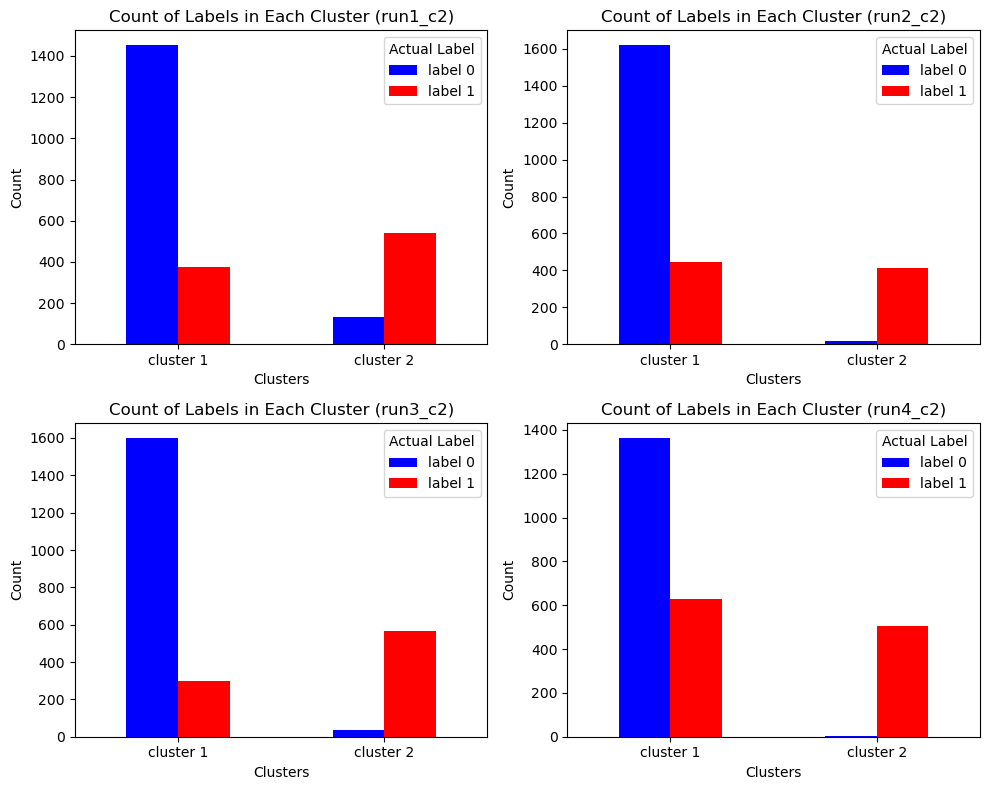

In [279]:
# create a 2*2 figure for the subplots
fig, axes= plt.subplots(2,2, figsize=(10,8))
plot_kmeans_results(run1_c2_results, 'run1_c2', axes[0,0])
plot_kmeans_results(run2_c2_results, 'run2_c2', axes[0,1])
plot_kmeans_results(run3_c2_results, 'run3_c2', axes[1,0])
plot_kmeans_results(run4_c2_results, 'run4_c2', axes[1,1])
plt.tight_layout()
plt.show()

# 2. C3

## 2-1. run1_data

In [280]:
run1_c3_data, run1_c3_data_wo_label = read_data('run1_data.csv', 'c3')

In [281]:
run1_c3_results = kmeans_compute(run1_c3_data, run1_c3_data_wo_label, 'c3')
run1_c3_results

c3,label 0,label 1
cluster,,
cluster 1,1450,379
cluster 2,111,560


## 2-2. run2_data

In [282]:
run2_c3_data, run2_c3_data_wo_label = read_data('run2_data.csv', 'c3')

In [283]:
run2_c3_results = kmeans_compute(run2_c3_data, run2_c3_data_wo_label, 'c3')
run2_c3_results

c3,label 0,label 1
cluster,,
cluster 1,1760,307
cluster 2,7,426


## 2-3. run3_data

In [284]:
run3_c3_data, run3_c3_data_wo_label = read_data('run3_data.csv', 'c3')

In [285]:
run3_c3_results = kmeans_compute(run3_c3_data, run3_c3_data_wo_label, 'c3')
run3_c3_results

c3,label 0,label 1
cluster,,
cluster 1,1390,509
cluster 2,11,590


## 2-4. run4_data

In [286]:
run4_c3_data, run4_c3_data_wo_label = read_data('run4_data.csv', 'c3')

In [287]:
run4_c3_results = kmeans_compute(run4_c3_data, run4_c3_data_wo_label, 'c3')
run4_c3_results

c3,label 0,label 1
cluster,,
cluster 1,1066,925
cluster 2,3,506


## Display bar charts for each dataset in regards to c3

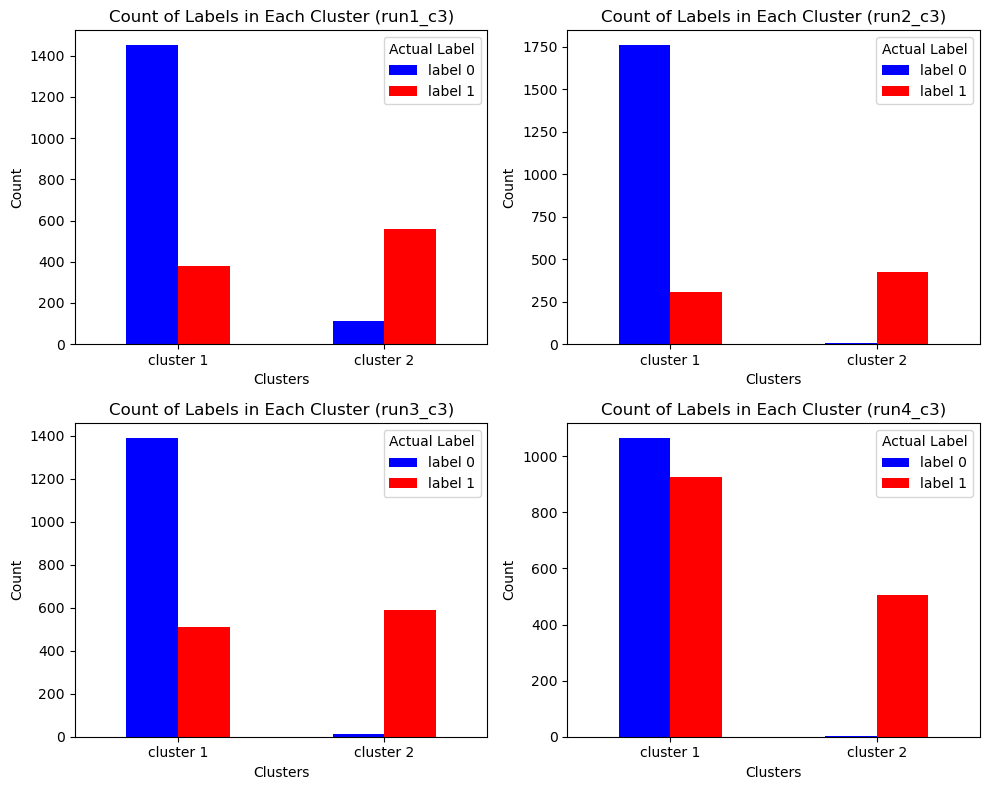

In [288]:
# create a 2*2 figure for the subplots
fig, axes= plt.subplots(2,2, figsize=(10,8))
plot_kmeans_results(run1_c3_results, 'run1_c3', axes[0,0])
plot_kmeans_results(run2_c3_results, 'run2_c3', axes[0,1])
plot_kmeans_results(run3_c3_results, 'run3_c3', axes[1,0])
plot_kmeans_results(run4_c3_results, 'run4_c3', axes[1,1])
plt.tight_layout()
plt.show()

# 3. C4

## 3-1. run1_data

In [289]:
run1_c4_data, run1_c4_data_wo_label = read_data('run1_data.csv', 'c4')

In [290]:
run1_c4_results = kmeans_compute(run1_c4_data, run1_c4_data_wo_label, 'c4')
run1_c4_results

c4,label 0,label 1
cluster,,
cluster 1,1486,343
cluster 2,136,535


## 3-2. run2_data

In [291]:
run2_c4_data, run2_c4_data_wo_label = read_data('run2_data.csv', 'c4')

In [292]:
run2_c4_results = kmeans_compute(run2_c4_data, run2_c4_data_wo_label, 'c4')
run2_c4_results

c4,label 0,label 1
cluster,,
cluster 1,1716,351
cluster 2,26,407


## 3-3. run3_data

In [293]:
run3_c4_data, run3_c4_data_wo_label = read_data('run3_data.csv', 'c4')

In [294]:
run3_c4_results = kmeans_compute(run3_c4_data, run3_c4_data_wo_label, 'c4')
run3_c4_results

c4,label 0,label 1
cluster,,
cluster 1,1700,199
cluster 2,41,560


## 3-4. run4_data

In [295]:
run4_c4_data, run4_c4_data_wo_label = read_data('run4_data.csv', 'c4')

In [296]:
run4_c4_results = kmeans_compute(run4_c4_data, run4_c4_data_wo_label, 'c4')
run4_c4_results

c4,label 0,label 1
cluster,,
cluster 1,1358,633
cluster 2,3,506


## Display bar charts for each dataset in regards to c4

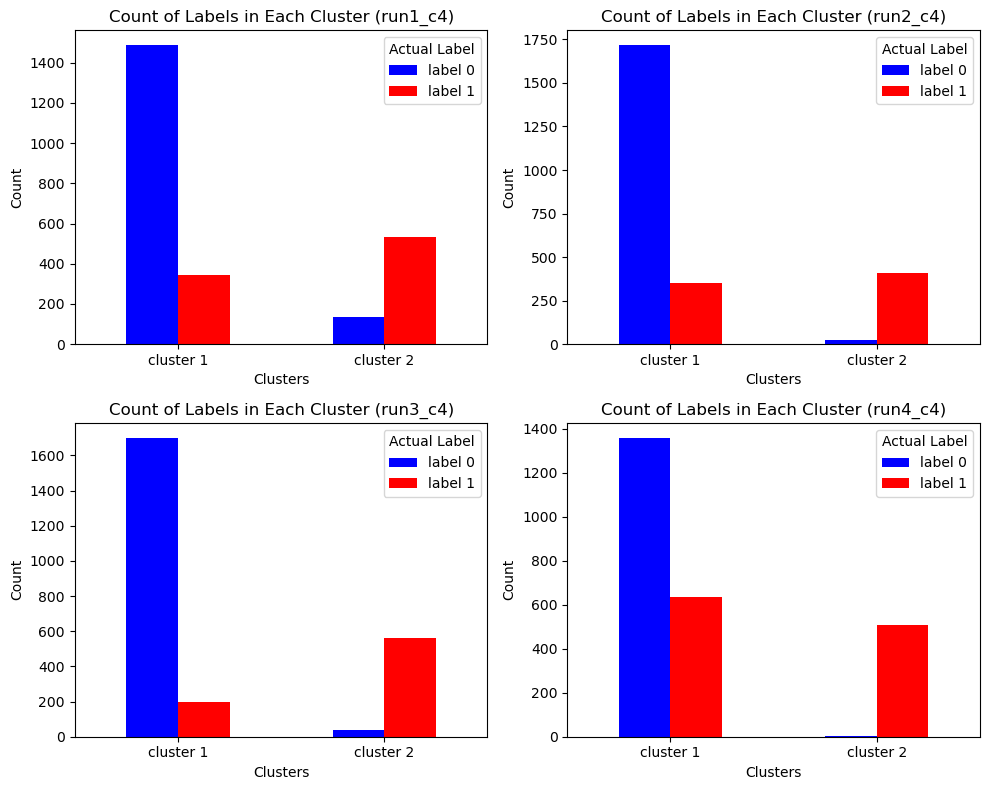

In [297]:
# create a 2*2 figure for the subplots
fig, axes= plt.subplots(2,2, figsize=(10,8))
plot_kmeans_results(run1_c4_results, 'run1_c4', axes[0,0])
plot_kmeans_results(run2_c4_results, 'run2_c4', axes[0,1])
plot_kmeans_results(run3_c4_results, 'run3_c4', axes[1,0])
plot_kmeans_results(run4_c4_results, 'run4_c4', axes[1,1])
plt.tight_layout()
plt.show()